Bootstrap (valid draws):   0%|          | 0/100 [00:00<?, ?draw/s]

/Users/raunaqrai/miniforge3/envs/jwst/lib/python3.12/site-packages/PyRSR/broad_line_fit.py:3365: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


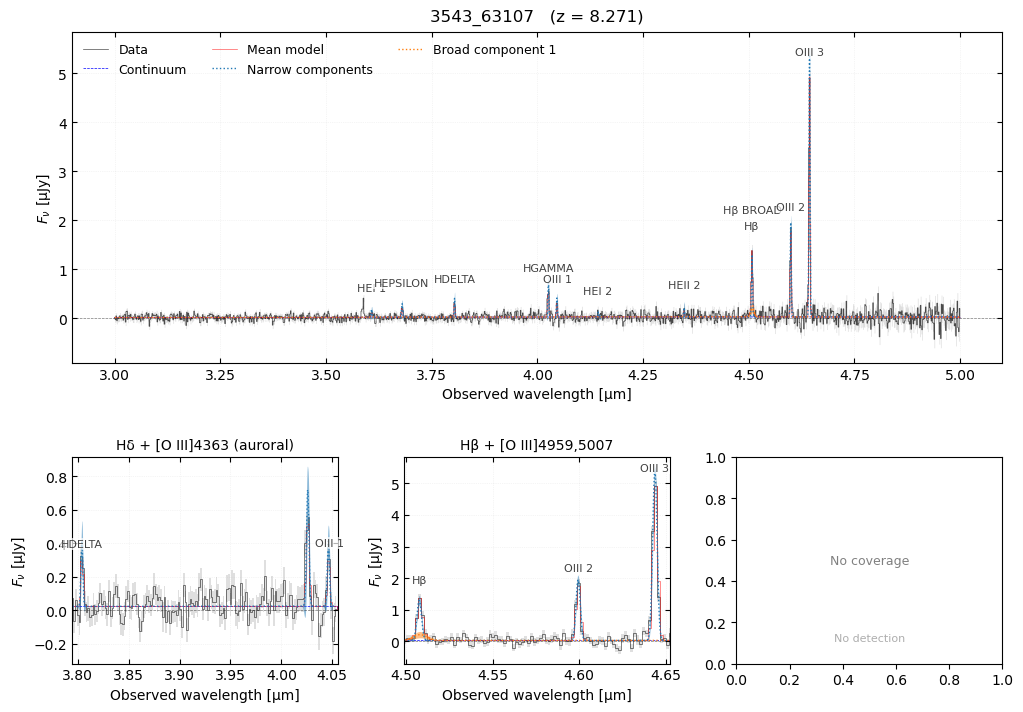


=== MODEL SELECTION (BIC Scores) ===

H-beta:
  Narrow only                      : BIC = 387.28
  Narrow + medium broad            : BIC = 275.66
  Narrow + medium + very broad     : BIC = 291.85
  Narrow + very broad only         : BIC = 276.51
  → Selected: Hβ: narrow + medium broad

H-delta:
  Narrow only                      : BIC = 392.07
  → Selected: Hδ: narrow only


=== BOOTSTRAP SUMMARY (value ± error) ===
Line               F_line [erg/s/cm²]          EW₀ [Å]        σ_A [Å]        μ_obs [Å]    SNR_int   SNR_peak(data)    SNR_peak(model)
-----------------------------------------------------------------------------------------------------------------------------
HEI_1           9.811e-20 ± 3.948e-20    21.65 ± 10.23   10.33 ± 2.70   36078.1 ± 15.8 1.89 ± 0.69      1.63 ± 0.52        1.91 ± 0.74
HEPSILON        1.752e-19 ± 3.358e-20    39.36 ± 12.11   11.37 ± 1.49   36799.7 ± 10.9 3.30 ± 0.63      2.59 ± 0.45        3.20 ± 0.62
HDELTA          1.880e-19 ± 4.141e-20    42.31 ± 

In [1]:
from astropy.io import fits
import numpy as np
# NOTE: keep the same import path you used before
from PyRSR.broad_line_fit import broad_fit, print_bootstrap_line_table_broad

# ---------- Load + crop ----------
specfile = "../../data/excels-uds04-v4_g395m-f290lp_3543_63107.spec.fits"
with fits.open(specfile) as hdul:
    t = hdul["SPEC1D"].data
    lam = np.asarray(t["wave"])
    fnu = np.asarray(t["flux"])
    enu = np.asarray(t["err"])

target_msaid = "3543_63107"

mask = (lam >= 3.0) & (lam <= 5.0)
spec = dict(lam=lam[mask], flux=fnu[mask], err=enu[mask])

z = 8.271


boot = broad_fit(
    source=spec,    
    z=z,
    grating="G395M",
    source_id=target_msaid,
    n_boot=100,
    lyman_cut=None,
    deg=2,
    random_state=21,
    continuum_windows=None,
    plot=True,           
    show_progress=True,  
    save_path=None,
    lines_to_use=None,
    broad_mode="auto",
    verbose=False

)

print_bootstrap_line_table_broad(boot)


Fit with lines=['NII_2', 'H⍺', 'NII_3']: χ²=510.95, k=9, BIC=555.42
Fit with lines=['NII_2', 'H⍺', 'NII_3', 'H⍺_BROAD']: χ²=154.04, k=12, BIC=213.34
Fit with lines=['NII_2', 'H⍺', 'NII_3', 'H⍺_BROAD', 'H⍺_BROAD2']: χ²=164.73, k=15, BIC=238.85
Fit with lines=['NII_2', 'H⍺', 'NII_3', 'H⍺_BROAD2']: χ²=246.46, k=12, BIC=305.76
Local Hα+[N II] BIC (Hα window only):
  narrow-only      : BIC = 555.42
  +BROAD only      : BIC = 213.34
  +BROAD2 only     : BIC = 305.76
  +both BROAD      : BIC = 238.85
  → Selected model: narrow + BROAD
Fit with lines=['HBETA', 'OIII_2', 'OIII_3']: χ²=482.36, k=9, BIC=529.34
Fit with lines=['HBETA', 'OIII_2', 'OIII_3', 'HBETA_BROAD']: χ²=3427.02, k=12, BIC=3489.66
Fit with lines=['HBETA', 'OIII_2', 'OIII_3', 'HBETA_BROAD', 'HBETA_BROAD2']: χ²=962.44, k=15, BIC=1040.74
Fit with lines=['HBETA', 'OIII_2', 'OIII_3', 'HBETA_BROAD2']: χ²=3499.28, k=12, BIC=3561.92
Local Hβ+[O III] BIC (Hβ window only):
  narrow-only      : BIC = 529.34
  +BROAD only      : BIC = 3489

Bootstrap (valid draws):   0%|          | 0/200 [00:00<?, ?draw/s]


FLUX DIAGNOSTIC: Hα Region

Component fluxes in Hα region (4.5472 - 4.7855 µm):
  NII_2          : 1.010e-18 erg/s/cm²
  H⍺             : 3.000e-17 erg/s/cm²
  NII_3          : 7.988e-19 erg/s/cm²
  H⍺_BROAD       : 1.660e-17 erg/s/cm²

Total (sum of components)     : 4.841e-17 erg/s/cm²
Total (integrated model)      : 4.965e-17 erg/s/cm²
Ratio (components/model)      : 0.9750
Discrepancy                   : -2.50%



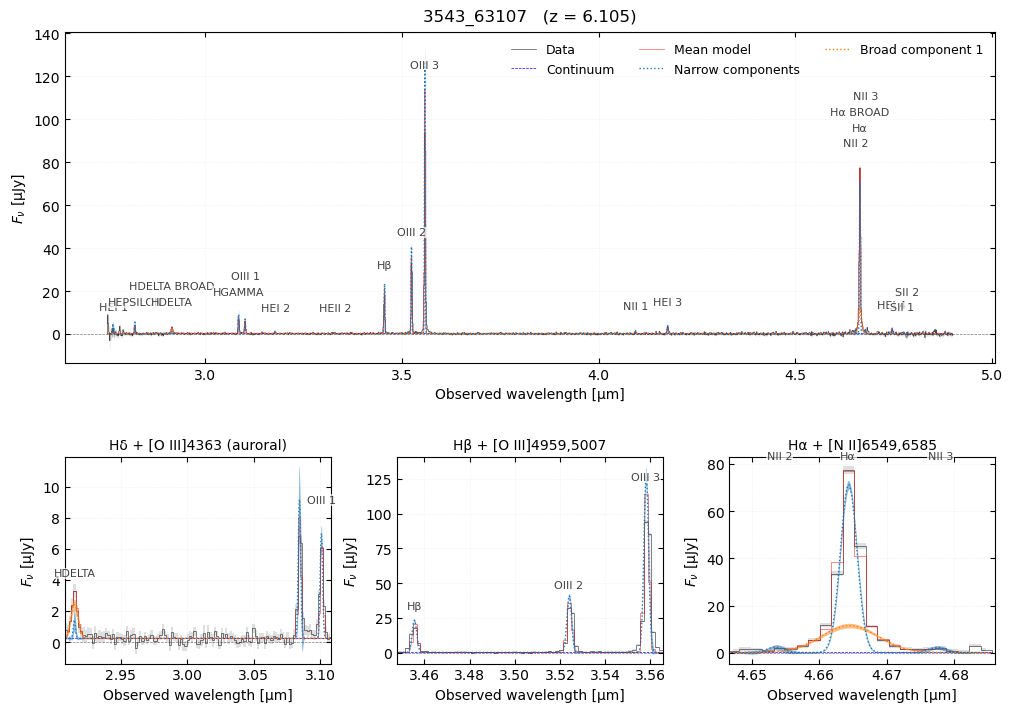


=== MODEL SELECTION (BIC Scores) ===

H-alpha:
  Narrow only                      : BIC = 555.42
  Narrow + medium broad            : BIC = 213.34
  Narrow + medium + very broad     : BIC = 238.85
  Narrow + very broad only         : BIC = 305.76
  → Selected: Hα: narrow + medium broad

H-beta:
  Narrow only                      : BIC = 529.34
  Narrow + medium broad            : BIC = 3489.66
  Narrow + medium + very broad     : BIC = 1040.74
  Narrow + very broad only         : BIC = 3561.92
  → Selected: Hβ: narrow only

H-delta:
  Narrow only                      : BIC = 680.05
  Narrow + medium broad            : BIC = 640.12
  Narrow + very broad only         : BIC = 671.63
  → Selected: Hδ: narrow + medium broad


=== BOOTSTRAP SUMMARY (value ± error) ===
Line               F_line [erg/s/cm²]          EW₀ [Å]        σ_A [Å]        μ_obs [Å]    SNR_int   SNR_peak(data)    SNR_peak(model)
--------------------------------------------------------------------------------------------

In [2]:
from astropy.io import fits
import numpy as np
from PyRSR.broad_line_fit import broad_fit, print_bootstrap_line_table_broad



# ---------- Load + crop ----------
specfile = "../../data/stark-rxcj2248-v4_g395m-f290lp_2478_3.spec.fits"
with fits.open(specfile) as hdul:
    t = hdul["SPEC1D"].data
    lam = np.asarray(t["wave"])
    fnu = np.asarray(t["flux"])
    enu = np.asarray(t["err"])

target_msaid = "3543_63107"

mask = (lam >= 2.75) & (lam <= 5)
spec = dict(lam=lam[mask], flux=fnu[mask], err=enu[mask])

z = 6.1052


boot = broad_fit(
    source=spec,    
    z=z,
    grating="G395M",
    source_id=target_msaid,
    n_boot=200,
    lyman_cut=None,
    deg=2,
    random_state=21,
    continuum_windows=None,
    plot=True,           
    show_progress=True,   
    save_path=None,
    lines_to_use=None,
    broad_mode="auto",
    verbose=True,
    plot_unit='fnu',
)

print_bootstrap_line_table_broad(boot)